In [1]:
from ultralytics import YOLO
import PIL 
from PIL import Image
from IPython.display import display
import os 
import pathlib
import cv2

In [2]:
model = YOLO("best.pt")

In [3]:
results = model.predict(source="images/drowsy-driving.jpg",
                        save=True, conf=0.1, iou=0.5)


image 1/1 c:\Machine Learning Projects\Drowsiness-Detector\images\drowsy-driving.jpg: 448x640 1 awake, 2 drowsys, 348.5ms
Speed: 5.2ms preprocess, 348.5ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs\detect\predict


In [4]:
names = model.names
for pred in results[0].boxes:
    class_id = int(pred.cls[0])
    confidence = pred.conf[0].item()
    class_name = names[class_id]
    print(f"Class: {class_name}, Confidence: {confidence}")

Class: drowsy, Confidence: 0.42658531665802
Class: awake, Confidence: 0.21415133774280548
Class: drowsy, Confidence: 0.1254921406507492


In [5]:
names = model.names
try:
    prediction = names[int(results[0].boxes.cls[0])]
except:
    prediction = 'empty'
print(prediction)

drowsy


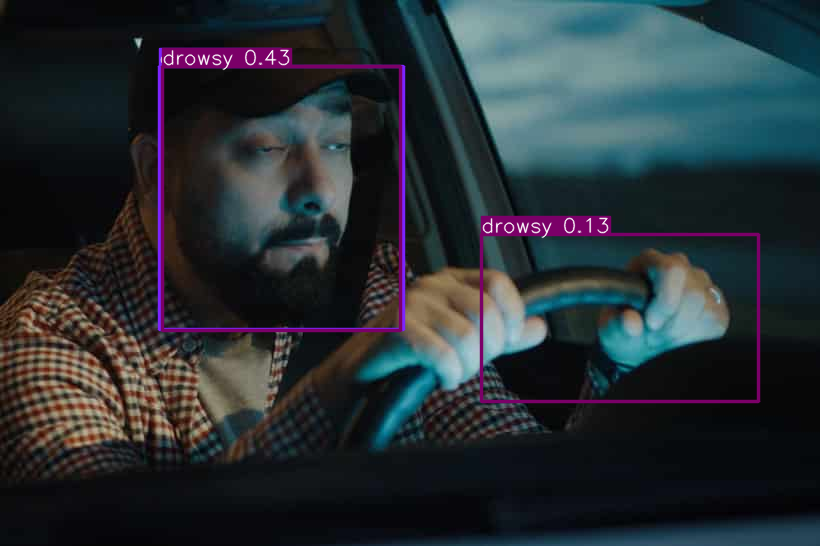

In [6]:
class_labels = ["Non-Drowsy", "Drowsy"]
# Plot the results
plot = results[0].plot(labels=class_labels)  # Add class labels to the plot
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))